In [ ]:
import numpy as np
#import matplotlib.pyplot as plt
import sys
caffe_root = '/home/anojan/workspace/caffe_install/caffe-segnet-cudnn5/'
sys.path.insert(0,'/home/anojan/anaconda2/envs/env/lib/python2.7/site-packages/')
sys.path.insert(0,caffe_root + 'python')
import caffe
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import data
from skimage import novice
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import img_as_float


caffe.set_mode_gpu();
caffe.set_device(0)
solver_path = '../models/segnet_solver.prototxt'
solver = caffe.get_solver(solver_path)
#solver.net.copy_from('../models/icnet_cityscapes_train_30k.caffemodel');
#solver.restore('/home/anojan/us_project/caffemodels_iter_10000.solverstate')
#weights_path='../models/icnet_cityscapes_train_30k.caffemodel'
#solver.net.weights=caffe_root+weights_path
for layer_name, blob in solver.net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

train_img ={};
train_lab ={};

file_seg = open('../us_data/labels.txt', 'r') ;
file_img = open('../us_data/images.txt', 'r') ;

idx = 0;
for line in file_img:
    train_img[idx] = line[0:-1];
    #print (train_img[idx]);
    idx = idx + 1;
    
idx = 0;
for line in file_seg:
    train_lab[idx] = line[0:-1];
    #print (train_lab[idx]);
    idx = idx + 1;
train_img = [ v for v in train_img.values() ];
train_lab = [ v for v in train_lab.values() ];
batch_size=3

sample = len(train_img);
N = range(sample);
ite_total = sample/batch_size;

vari=0

for epochs in range(0,150):
    random.shuffle(N);
    ite_idx=0;
    for ite in range(0,ite_total):
        for batch_idx in xrange(batch_size):
            vari=vari+1
            
            print vari
            print 'ite_idx',ite_idx
            print 'batch_idx',batch_idx
            img0 = imread(train_img[ite_idx]).transpose();
            print train_img[ite_idx]
         
        
            solver.net.blobs['data'].data[batch_idx] = img0;
       
            lab = imread(train_lab[ite_idx]).transpose();
        
            #lab_float = img_as_float(lab)
            print lab.shape
            print train_lab[ite_idx]
        #(512,512) image reshaped to (1,512,512)
            lab2 = cv2.threshold(lab, 127, 1, cv2.THRESH_BINARY)[1]
            solver.net.blobs['label'].data[batch_idx][0] = lab2;
            ite_idx=ite_idx+1;
        solver.step(1);

        

        #if vari%2000==0:
            #solver.net.save('/home/anojan/us_project/caffemodels/segnet'+str(vari)+'.caffemodel')



data	(3, 3, 560, 360)
label	(3, 1, 560, 360)
label_input_1_split_0	(3, 1, 560, 360)
label_input_1_split_1	(3, 1, 560, 360)
conv1_1	(3, 64, 560, 360)
conv1_2	(3, 64, 560, 360)
pool1	(3, 64, 280, 180)
pool1_mask	(3, 64, 280, 180)
conv2_1	(3, 128, 280, 180)
conv2_2	(3, 128, 280, 180)
pool2	(3, 128, 140, 90)
pool2_mask	(3, 128, 140, 90)
conv3_1	(3, 256, 140, 90)
conv3_2	(3, 256, 140, 90)
conv3_3	(3, 256, 140, 90)
pool3	(3, 256, 70, 45)
pool3_mask	(3, 256, 70, 45)
conv4_1	(3, 512, 70, 45)
conv4_2	(3, 512, 70, 45)
conv4_3	(3, 512, 70, 45)
pool4	(3, 512, 35, 23)
pool4_mask	(3, 512, 35, 23)
conv5_1	(3, 512, 35, 23)
conv5_2	(3, 512, 35, 23)
conv5_3	(3, 512, 35, 23)
pool5	(3, 512, 18, 12)
pool5_mask	(3, 512, 18, 12)
pool5_D	(3, 512, 35, 23)
conv5_3_D	(3, 512, 35, 23)
conv5_2_D	(3, 512, 35, 23)
conv5_1_D	(3, 512, 35, 23)
pool4_D	(3, 512, 70, 45)
conv4_3_D	(3, 512, 70, 45)
conv4_2_D	(3, 512, 70, 45)
conv4_1_D	(3, 256, 70, 45)
pool3_D	(3, 256, 140, 90)
conv3_3_D	(3, 256, 140, 90)
conv3_2_D	(3, 256,

In [2]:
np.unique(lab2)

array([0, 1], dtype=uint8)

<function matplotlib.pyplot.show>

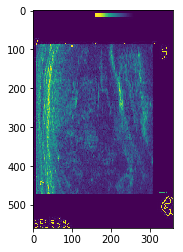

In [10]:
plt.figure
plt.imshow(img0[0,:,:])
plt.show

In [4]:
np.unique(img0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [5]:
img0.shape

(3, 560, 360)